<a href="https://colab.research.google.com/github/JeffSoledade/DataScience_challenge1/blob/main/AluraStoreBr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importação dos dados

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

## Dados em painel

In [2]:
loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


## Funções

In [15]:
# 1. Grafico faturamento por loja
def gerar_grafico_faturamento_loja(lojas_dados):
    """
    Gera um gráfico de barras com o faturamento total de cada loja.

    Parâmetros:
    lojas_dados (list): Lista de tuplas com o DataFrame da loja e o nome da loja.
    """
    nomes_lojas = []
    valores_faturamento = []

    for loja, nome_loja in lojas_dados:
        nomes_lojas.append(nome_loja)
        valores_faturamento.append(loja['Preço'].sum())

    plt.figure(figsize=(13, 4))
    plt.bar(nomes_lojas, valores_faturamento, color= ['#FFB200', '#EB5B00', '#D91656', '#640D5F'])
    plt.title('Faturamento por Loja', fontsize=18, color= '#001F3F')
    plt.grid(alpha=0.4, linestyle='--', linewidth=0.2, color= 'gray')
    plt.tight_layout()

    plt.rcParams['axes.edgecolor'] = 'none'
    plt.rcParams['axes.facecolor'] = 'white'

    # Adicionando os valores acima das barras
    for i, valor in enumerate(valores_faturamento):
      plt.text(i, valor + 500, f'R$ {valor:,.2f}', ha='center', va='bottom', fontsize=9, color= '#001F3F')





# 2. Grafico categoria por loja
def gerar_grafico_categoria_por_loja(lojas_dados):
    """
    Gera um gráfico de barras horizontais com as vendas por categoria de produto,
    comparando entre diferentes lojas.

    Parâmetros:
    lojas_dados (list): Lista de tuplas com o DataFrame da loja e o nome da loja.
    """
    # Criar um DataFrame consolidado com todas as categorias e lojas
    categorias = set()
    for loja, _ in lojas_dados:
        categorias.update(loja['Categoria do Produto'].unique())

    categorias = sorted(categorias)

    # Preparar os dados para o gráfico
    dados_grafico = {}
    for loja, nome_loja in lojas_dados:
        categoria_por_loja = loja.groupby('Categoria do Produto')['Preço'].sum()
        dados_grafico[nome_loja] = [categoria_por_loja.get(cat, 0) for cat in categorias]


    plt.figure(figsize=(13, 8))
    cores = ['#FFB200', '#EB5B00', '#D91656', '#640D5F']
    bar_width = 0.21
    posicoes = range(len(categorias))


    for i, (nome_loja, vendas) in enumerate(dados_grafico.items()):
        plt.barh(
            [p + i * bar_width for p in posicoes],
            vendas,
            height=bar_width,
            label=nome_loja,
            color=cores[i]
        )

    plt.title('Vendas por Categoria e Loja', fontsize=18, color= '#001F3F')
    plt.yticks([p + bar_width * (len(lojas_dados)-1)/2 for p in posicoes], categorias)
    plt.legend()
    plt.grid(alpha=0.4, linestyle='--', linewidth=0.2, axis='x')

    # Adicionar valores nas barras
    for i, (nome_loja, vendas) in enumerate(dados_grafico.items()):
        for j, valor in enumerate(vendas):
            if valor > 0:
                plt.text(
                    valor + 1000,
                    j + i * bar_width,
                    f'R$ {valor:,.2f}',
                    va='center',
                    fontsize=8,
                    color= '#001F3F'
                )

    plt.tight_layout()
    plt.savefig('categoria_por_loja.png', dpi=300, bbox_inches='tight')





# 3. Grafico venda por categoria
def gerar_grafico_rosca_venda_por_categoria(lojas_dados):
    """
    Gera um gráfico de rosca (donut chart) com o total de vendas por categoria de produto,
    consolidando os dados de todas as lojas. A legenda mostra as categorias com suas cores
    e respectivos valores de venda, sem os percentuais no gráfico.

    Parâmetros:
    lojas_dados (list): Lista de tuplas com o DataFrame da loja e o nome da loja.
    """
    # Consolidar todas as categorias e somar as vendas
    categorias_vendas = {}

    for loja, _ in lojas_dados:
        for _, row in loja.iterrows():
            categoria = row['Categoria do Produto']
            preco = row['Preço']
            if categoria in categorias_vendas:
                categorias_vendas[categoria] += preco
            else:
                categorias_vendas[categoria] = preco

    # Ordenar categorias por valor de venda (decrescente)
    categorias_ordenadas = sorted(categorias_vendas.items(), key=lambda x: x[1], reverse=True)
    categorias = [item[0] for item in categorias_ordenadas]
    vendas = [item[1] for item in categorias_ordenadas]

    # Configurações do gráfico
    cores = ['#FFB200', '#EB5B00', '#D91656', '#640D5F', '#0C1844', '#0D92F4', '#7ED4AD', '#D9ABAB']
    explode = [0.02] * len(categorias)  # Pequena separação entre as fatias

    plt.figure(figsize=(13, 4))

    # Criar o gráfico de pizza com um buraco no meio (rosca) sem labels e sem percentuais
    wedges = plt.pie(
        vendas,
        labels=None,  # Sem labels no gráfico
        colors=cores[:len(categorias)],
        startangle=90,
        wedgeprops=dict(width=0.4, edgecolor='w'),  # width controla o tamanho do buraco
        autopct=None,  # sem os percentuais
        pctdistance=0.50,
        explode=None,
    )[0]  # Pegar apenas o primeiro retorno

    # Adicionar um círculo no centro para completar o efeito rosca
    centre_circle = plt.Circle((0, 0), 0.3, fc='white')
    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)

    # Adicionar informação do total no centro
    total_vendas = sum(vendas)
    plt.text(0, 0, f'Total\nR$ {total_vendas:,.2f}',
             ha='center', va='center',
             fontsize=12, fontweight='bold', color='#001F3F')

    # Criar labels para a legenda com os valores formatados
    legend_labels = [f'{cat} - R$ {val:,.2f}' for cat, val in zip(categorias, vendas)]

    # Adicionar legenda com as categorias, valores e cores respectivas
    plt.legend(
        wedges,
        legend_labels,
        title="Categorias e Valores",
        loc="center left",
        bbox_to_anchor=(1, 0, 0.5, 1),
        fontsize=10,
    )

    plt.axis('equal')  # Assegura que o gráfico fique circular
    plt.tight_layout()
    plt.savefig('venda_por_categoria_rosca.png', dpi=300, bbox_inches='tight')




# 4. Grafico avaliação média
def gerar_grafico_avaliacao_media(lojas_dados):
    """
    Gera um gráfico de barras com a avaliação média de cada loja.

    Parâmetros:
    lojas_dados (list): Lista de tuplas com o DataFrame da loja e o nome da loja.
    """
    nomes_lojas = []
    medias_avaliacao = []

    for loja, nome_loja in lojas_dados:
        nomes_lojas.append(nome_loja)
        medias_avaliacao.append(loja['Avaliação da compra'].mean())

    plt.figure(figsize=(13, 4))
    plt.bar(nomes_lojas, medias_avaliacao, color=['#FFB200', '#EB5B00', '#D91656', '#640D5F'])
    plt.title('Avaliação Média por Loja', fontsize=18, color='#001F3F')
    plt.grid(alpha=0.4, linestyle='--', linewidth=0.2, color='gray')
    plt.tight_layout()

    plt.rcParams['axes.edgecolor'] = 'none'
    plt.rcParams['axes.facecolor'] = 'white'




# 5. Grafico vendas produtos
def gerar_grafico_vendas_produto(lojas_dados):
    """
    Gera um gráfico de barras com a quantidade de vendas por produto.

    Parâmetros:
    df (DataFrame): DataFrame contendo os dados de vendas com coluna 'Produto'.
    """
    # Contar a ocorrência de cada produto
    vendas_por_produto = (loja['Produto'].value_counts())

    produtos = vendas_por_produto.index.tolist()
    quantidades = vendas_por_produto.values.tolist()

    # Definir cores com base nas quantidades
    cores = []
    for qtd in quantidades:
        if qtd < 40:
            cores.append('#D91656')  # Vermelho para valores menores que 30
        elif qtd < 50:
            cores.append('#FFB200')  # Amarelo para valores menores que 30
        elif qtd < 60:
            cores.append('#89AC46')  # Verde claro para valores menores que 50
        else:
            cores.append('#399918')  # Verde para valores iguais ou maiores que 50

    plt.figure(figsize=(13, 6))
    plt.bar(produtos, quantidades, color=cores)
    plt.title('Quantidade de Vendas por Produto', fontsize=18, color='#001F3F')
    plt.grid(alpha=0.4, linestyle='--', linewidth=0.2, color='gray')
    plt.xticks(rotation=45, ha='right')  # Rotacionar labels dos produtos para melhor legibilidade
    plt.tight_layout()

    # Adicionando os valores acima das barras
    for i, valor in enumerate(quantidades):
        plt.text(i, valor + 0.5, str(valor), ha='center', va='bottom', fontsize=9, color='#001F3F')

    plt.rcParams['axes.edgecolor'] = 'none'
    plt.rcParams['axes.facecolor'] = 'white'

    plt.show()



plt.show()
lojas = [(loja, 'Loja1'), (loja2, 'Loja 2'), (loja3, 'Loja 3'), (loja4, 'Loja 4')]

#1. Análise do faturamento

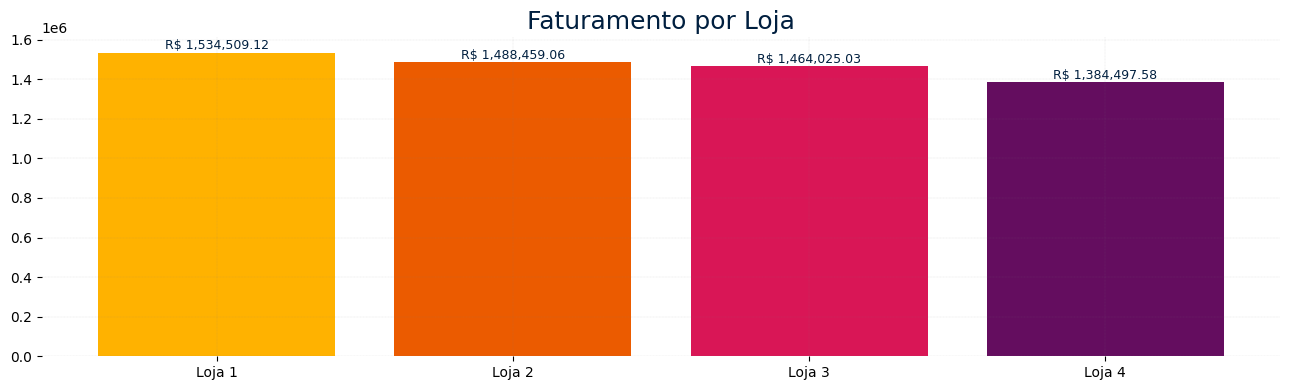

In [5]:
gerar_grafico_faturamento_loja(lojas)

#2. Análise por categoria

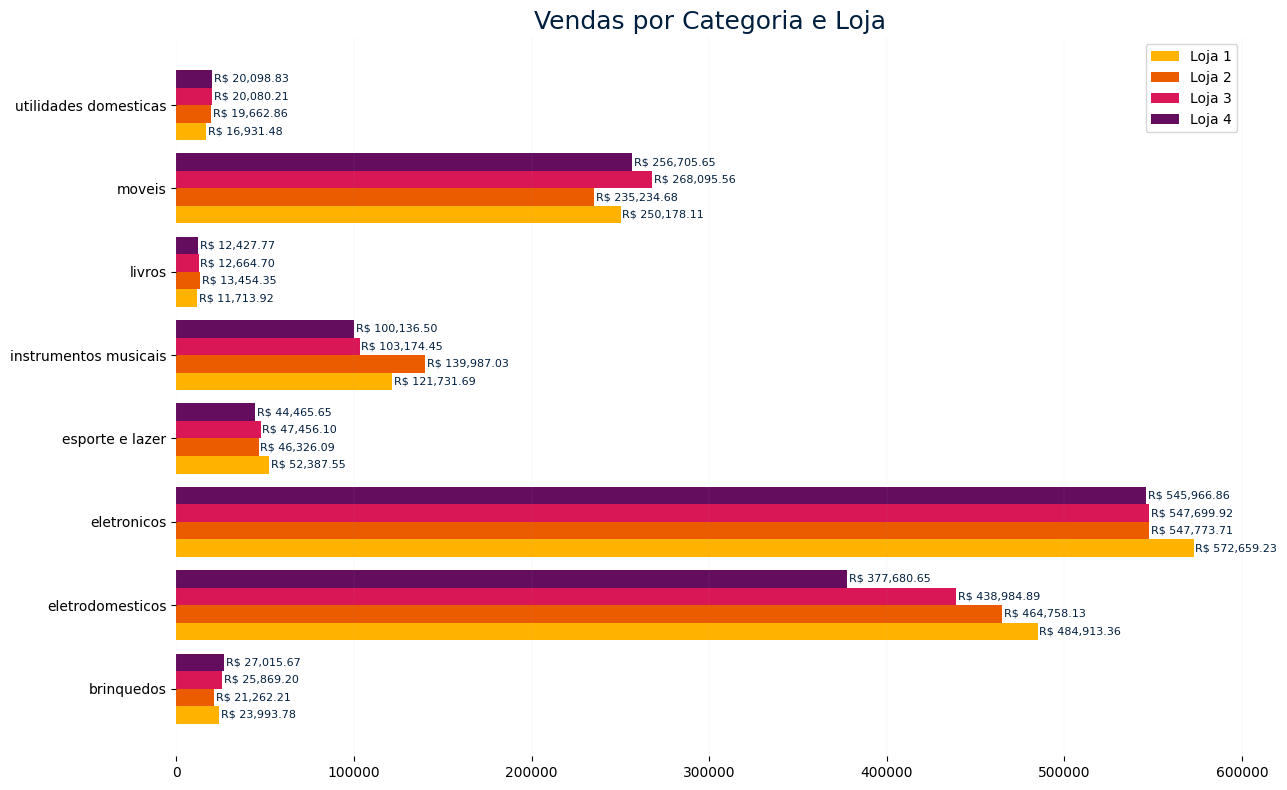

In [6]:
gerar_grafico_categoria_por_loja(lojas)

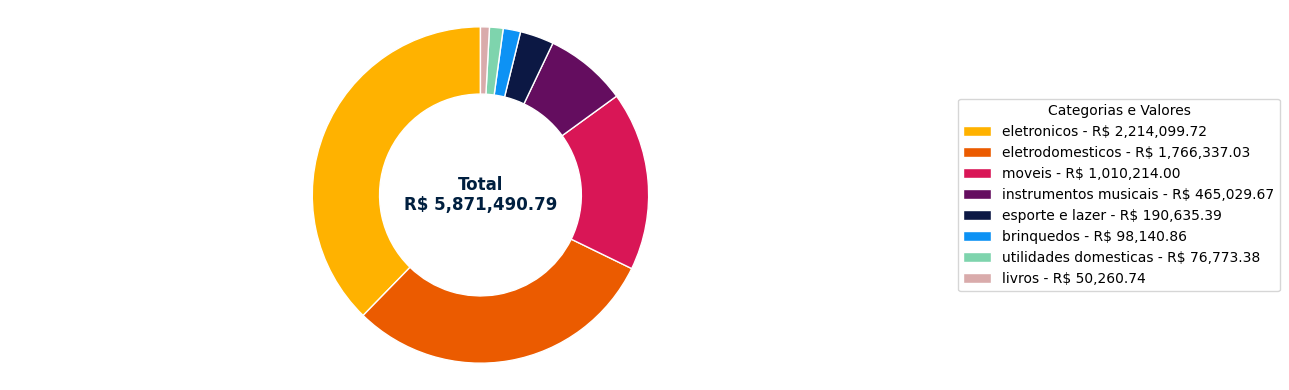

In [7]:
gerar_grafico_rosca_venda_por_categoria(lojas)

# 3. Média de Avaliação das Lojas

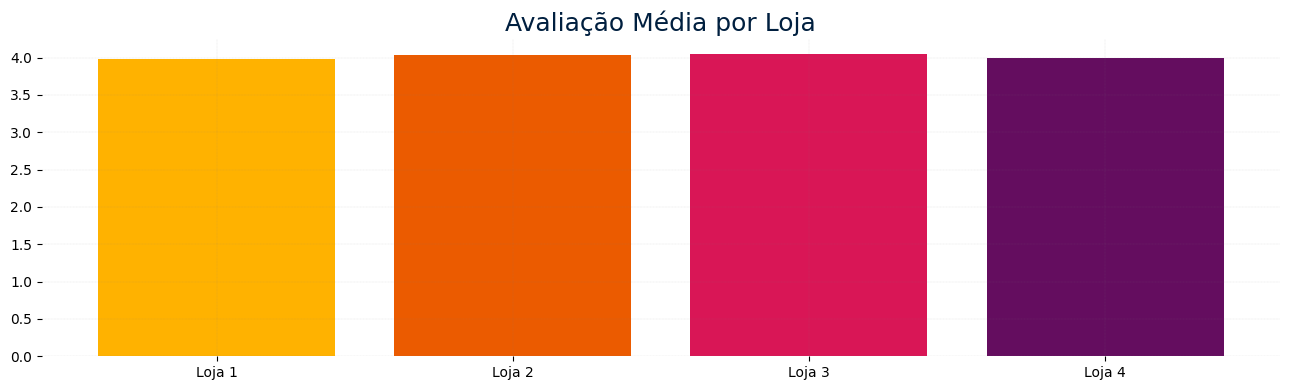

In [8]:
gerar_grafico_avaliacao_media(lojas)

# 4. Produtos Mais e Menos Vendidos

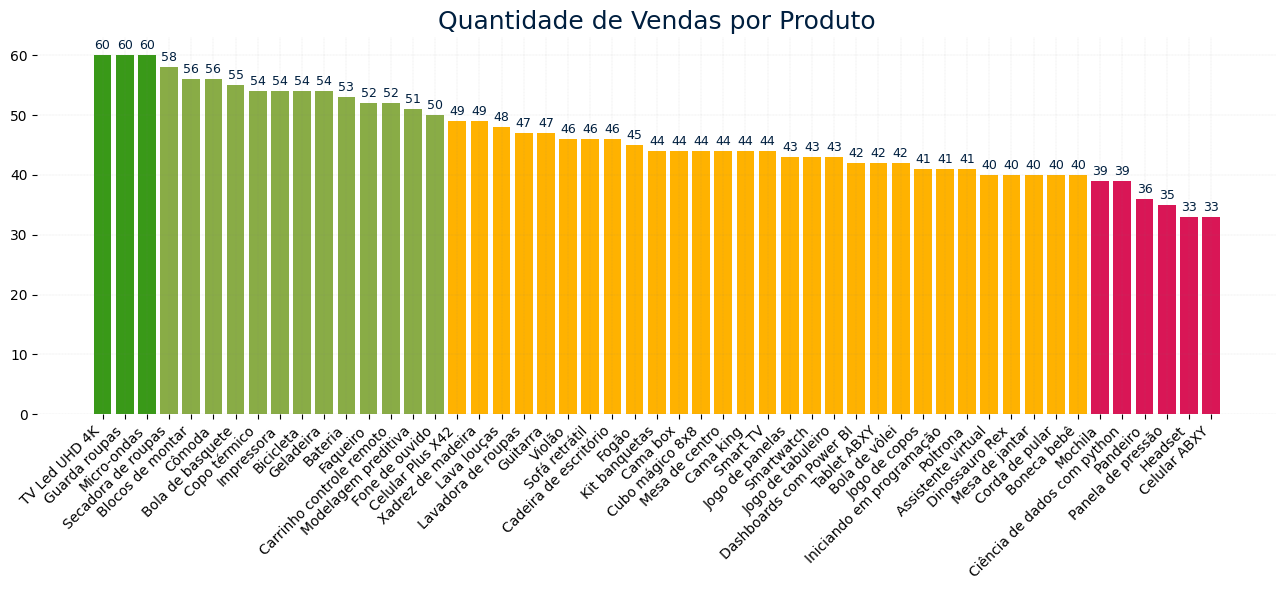

In [16]:
gerar_grafico_vendas_produto(lojas)

# 5. Frete Médio por Loja
